In [233]:
import augur

# import everything from githubapi.py and ghtorrent.py so we can
# just copy and paste our function later
import json
import re
from dateutil.parser import parse
import pandas as pd
import github
import numpy as np
import sqlalchemy as s
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
from pandas.api.types import is_numeric_dtype



%matplotlib inline
# create an Augur application so we can test our function
augur_app = augur.Application()('../augur.cfg')
github = augurApp.github()
ghtorrent = augurApp.ghtorrent()

In [234]:
df = ghtorrent.issue_comment_time('rails', 'rails')


In [235]:
df['opened'] = pd.to_datetime(df['opened'],errors='coerce')
df = df.set_index(['opened'])
df = df.dropna()


In [236]:
test = df[np.abs(df['minutes_to_comment']-df['minutes_to_comment'].mean()<=(5*df['minutes_to_comment'].std()))] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.


In [237]:
dfnew = test.resample('W-MON').mean()

In [238]:
dfnew2 = dfnew.fillna(0)

In [239]:
dfnew3 = dfnew2.rolling(window=8, min_periods=0).mean()


In [240]:
dfnew3.head()

,id,pull_request,minutes_to_comment
opened,,,
2009-04-06,136626.000000,0.0,22716.000000
2009-04-13,68313.000000,0.0,11358.000000
2009-04-20,91083.666667,0.0,7585.666667
2009-04-27,68312.750000,0.0,5689.250000
2009-05-04,81975.000000,0.0,4552.400000


In [241]:
max(dfnew3['minutes_to_comment'])

60904.67928001276

In [242]:
dfnext=pd.DataFrame({'xvalues':dfnew2.index, 'yvalues':dfnew2["minutes_to_comment"]})

In [243]:
max(dfnext['yvalues'])

82184.95555555556

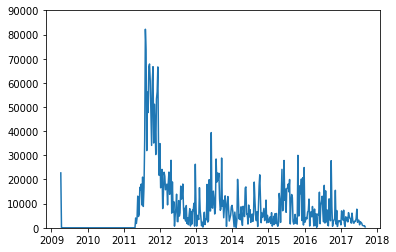

In [244]:
pylab.ylim([0,90000])
pylab.plot('xvalues', 'yvalues', data=dfnext, label="Issue Response Time")